# **E-News Express Project**

# Project Business Statistics: E-news Express


**Context**
The advent of e-news portals has revolutionized how users quickly access updates on day-to-day global events. Information on these portals is retrieved electronically from online databases, processed by various software, and transmitted to users. The advantages of electronic news include faster access to content, the use of diverse technologies such as audio, video, graphics, and interactive elements, which are often not possible in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. To achieve this, the company analyzes user actions to understand interests and improve engagement strategies. Executives at E-news Express believe that a decline in new monthly subscribers over the past year is partly due to the old webpage’s outdated design and less engaging content.

In response, the company initiated an A/B testing experiment, a technique widely used to compare two product versions based on user responses. This method helps determine whether a new feature — such as a redesigned landing page — attracts users more effectively based on measurable outcomes.

## Define Problem Statement and Objectives

** Objective**
The design team at E-news Express has created a new landing page featuring an updated outline and more relevant content compared to the previous version.
To test its effectiveness in attracting new subscribers, the Data Science team conducted an A/B test by:

Randomly selecting 100 users.

Dividing them equally into two groups:

The control group: served the existing (old) landing page.

The treatment group: served the new landing page.

User interaction data for both groups was collected, focusing on engagement and conversion behavior.

As a Data Scientist at E-news Express, you are tasked with performing statistical analysis (at a 5% significance level) to determine whether the new landing page is more effective in attracting new subscribers. You will answer the following key questions:


**1- Do the users spend more time on the new landing page than on the existing landing page?**

**2- Is the conversion rate (the proportion of users who visit the landing page and get converted) greater for the new page compared to the old page?**

**3- Does the conversion status depend on the preferred language?**

**4- Is the time spent on the new page the same across different language users?**




**Data Background and contents. **

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id – Unique user ID of the person visiting
the website

group – Whether the user belongs to the first
group (control) or the second group (treatment)

landing_page – Whether the landing page is new or old

time_spent_on_the_page – Time (in minutes) spent
by the user on the landing page

converted – Whether the user gets converted to a subscriber of the news portal or not

language_preferred – Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')

## Reading the Data into a DataFrame

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
df=pd.read_csv('abtest.csv')
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#making a copy of the dataset
df_copy=df.copy()

In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id – Unique user ID of the person visiting  
   the website

2. group – Whether the user belongs to the first  
   group (control) or the second group (treatment)

3. landing_page – Whether the landing page is new or
   old

4. time_spent_on_the_page – Time (in minutes) spent  
   by the user on the landing page

5. converted – Whether the user gets converted to a
   subscriber of the news portal or not

6. language_preferred – Language chosen by the user   to view the landing page

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


All columns have 100 non-null values, meaning at this point there are no missing values in the dataset —We will continue analyzing the dataset.

In [ ]:
df.shape

(100, 6)

* The dataset contains 100 rows and 6 columns, two
  numerical ( one Int and another float) and 4 object columns.

In [ ]:
df.isna().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [ ]:
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


There are no missing values in the dataset

In [ ]:
df.nunique()

,0
user_id,100
group,2
landing_page,2
time_spent_on_the_page,94
converted,2
language_preferred,3


In [ ]:
df['group'].value_counts()

,count
group,
control,50
treatment,50




*   There are 2 unique group types.



In [ ]:
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50




*   There are 2 unique landing page types.



In [ ]:
#Getting any negative value on time_spent_on_the_page
df[df['time_spent_on_the_page']<0]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


In [ ]:
df['converted'].value_counts()

,count
converted,
yes,54
no,46


In [ ]:
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32




*   There are 3 unique language preferred types.



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


Observations:
* The minimum time spent is:    0.19 minutes.
* The average time spent is:    5.38 minutes.
* The maximum time is:         10.71 minutes.

### Univariate Analysis

In [ ]:
df.columns

Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

The user_id column is a unique identifier and does not provide analytical value.

**Observations Group**

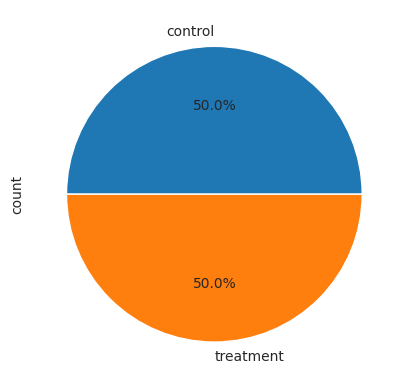

In [ ]:
#Plotting a pie chart for group column
df['group'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Observations:
The control group and treatment group each represent exactly 50% of the data.  

**Observations Landing Page**

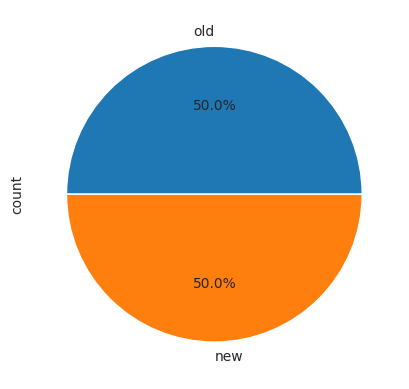

In [ ]:
##plotting a pie chart for landing_page column
df['landing_page'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Observations:
The old landing page and new landing page each also represent exactly 50% of the users.

**Observations Time Spent on The Page**

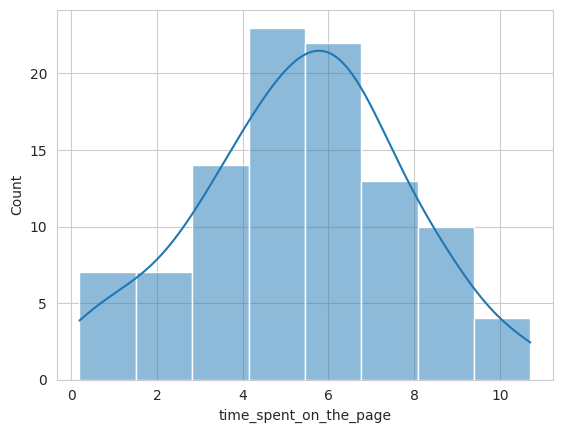

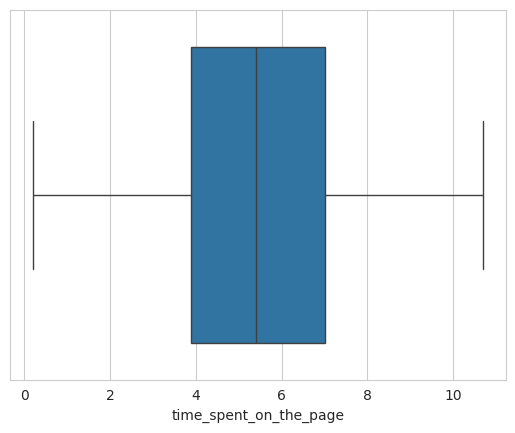

In [ ]:
#plotting time_spent_on_the_page
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

Observations:



*   The distribution of time spent on the page appears approximately normal.
*   The majority of users spend between 4 and 8 minutes on the page.



**Observations Converted**

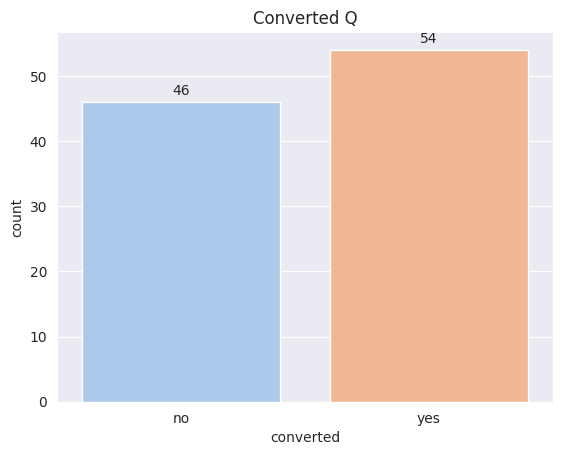

In [ ]:
#plotting converted colum
sns.set_style('darkgrid')
ax= sns.countplot(data=df,x='converted', hue='converted', palette='pastel')

#adding label
for container in ax.containers:
    ax.bar_label(container, fmt= '%d', label_type='edge', padding=3)

plt.title('Converted Q')
plt.show()



Observations:


*   The number of users who converted (yes) is slightly higher than those who
    did not convert (no).



**Observations language preferred**

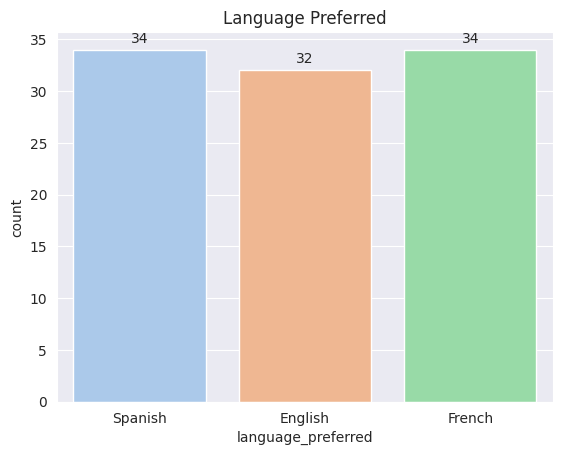

In [ ]:
#Plotting language_preferred column
sns.set_style('darkgrid')

ax= sns.countplot(data=df,x='language_preferred', hue='language_preferred', palette= 'pastel')
#adding labels
for container in ax.containers:
    ax.bar_label(container, fmt= '%d', label_type='edge', padding=3)

plt.title('Language Preferred')
plt.show()

Observations:
  * Spanish and French users have almost the same higher count compared to
    English users.

### Bivariate Analysis

**Observations converted vs group**




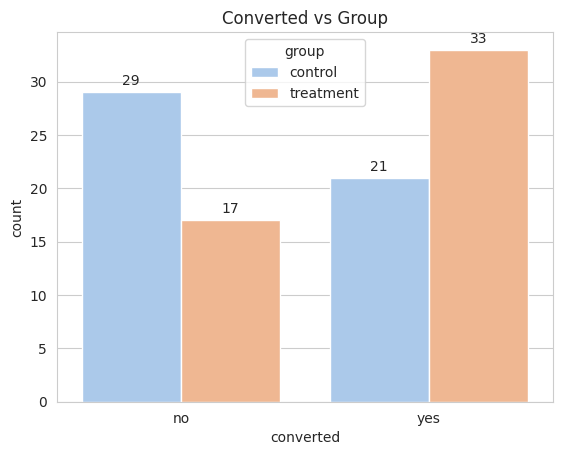

In [ ]:
#plotting converted column with hue group

sns.set_style('whitegrid')
ax= sns.countplot(data=df,x='converted', hue='group',palette='pastel')

#add labels
for container in ax.containers:
    ax.bar_label(container, fmt= '%d', label_type='edge', padding=3)

plt.title('Converted vs Group')
plt.show()


Observations:

  * Control group has a higher number of users who did not convert.
  * Treatment group is more successful at converting than the control group.

**Observations Landing page vs converted**

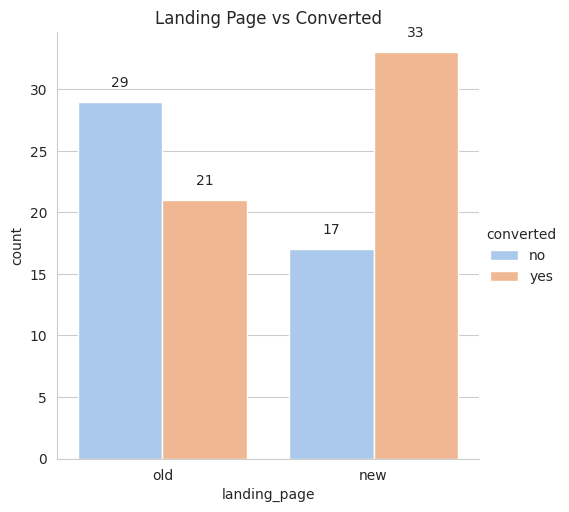

In [ ]:
#Plotting landing page and converted with catplot

# Create the catplot
cat_plot = sns.catplot(
    x='landing_page',
    hue='converted',
    kind='count',
    data=df,
    palette='pastel',
    height=5,
    aspect=1
)

# Add value labels on top of bars
for ax in cat_plot.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only show label if bar height is greater than 0
            ax.text(
                p.get_x() + p.get_width() / 2,
                height + 1,
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=10
            )

plt.title('Landing Page vs Converted')

plt.show()

Observations:

  * The old page a higher number of users who did not convert.
  * The new page is more successful at converting than the old page.

In [ ]:
df.groupby('landing_page')['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: count, dtype: int64

In [ ]:
#pivot table to compare convertion for landing page
df.pivot_table(index='landing_page', columns='converted', aggfunc='size')

converted,no,yes
landing_page,,
new,17,33
old,29,21


In [ ]:
# Create the pivot table
pivot_table = pd.pivot_table(
    df,
    values='user_id',             # using user_id to count rows
    index='landing_page',
    columns='converted',
    aggfunc='count',
    margins=True,                # adds total row and column
    margins_name='Total'         # names the total row/column
)

# Display the result
print(pivot_table)

converted     no  yes  Total
landing_page                
new           17   33     50
old           29   21     50
Total         46   54    100


Observations:

  * The new landing page has a higher conversion rate compared to the old page.
  * 66% of users converted on the new page, compared to 42% on the old page.

**Observations converted vs language**

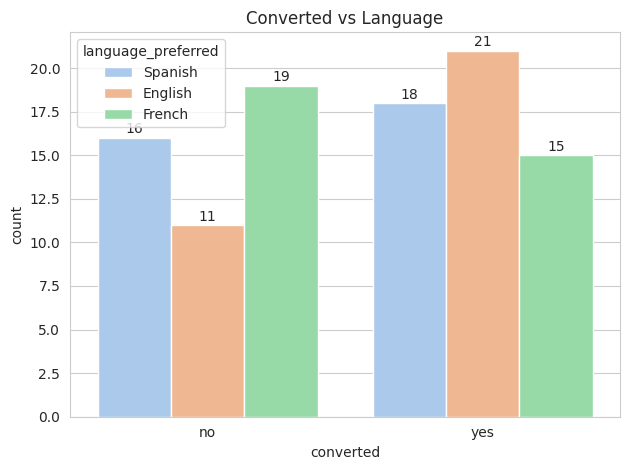

In [ ]:
#plotting converted and language
ax = sns.countplot(data=df,x='converted', hue='language_preferred',palette= 'pastel')

#adding label
for container in ax.containers:
    ax.bar_label(container, fmt= '%d', label_type='edge', padding=1)

#avoid overlaping
plt.title('Converted vs Language')
plt.tight_layout()
plt.show()

Observations:

 * English users have the highest conversion rate among the three languages.

 * Spanish users also show a good conversion rate but slightly lower than
  English.

 * French users have lower conversion rates compared to English and Spanish.

**Observations time spent vs converted**

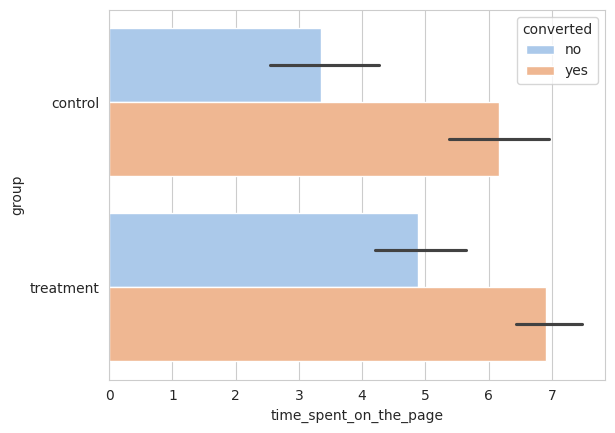

In [ ]:
#Plotting time spent and converting
sns.set_style('whitegrid')

sns.barplot(data=df,x='time_spent_on_the_page',y='group', hue='converted', palette= 'pastel')

plt.show()

Observations:

Users who converted spent the highest average time (around 7 min) in both groups.

There is a positive relationship between time spent and conversion.




**Observations time spent vs language**

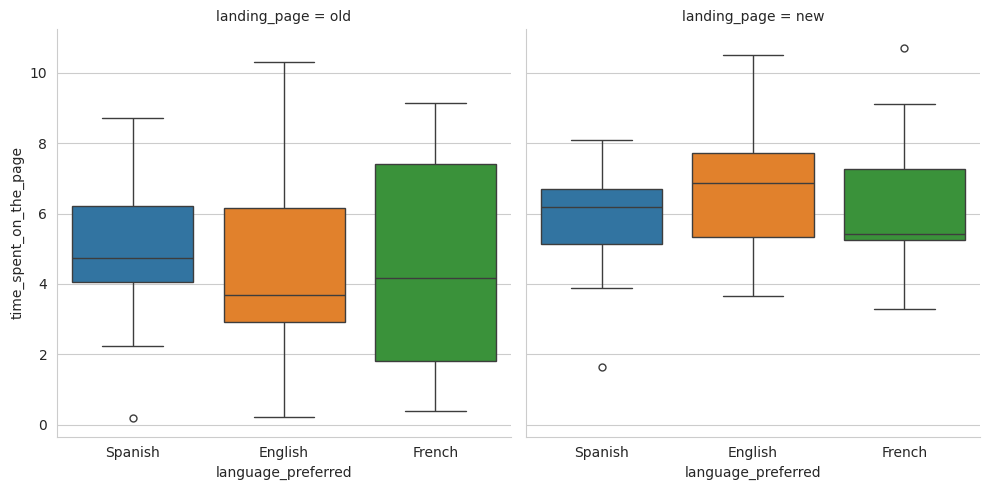

In [ ]:
##plotting time_spent_on_the_page in a cat plot by landing page
cat_plot = sns.catplot(x='language_preferred', y='time_spent_on_the_page', kind='box', data=df, col='landing_page', hue='language_preferred')
plt.show()

Observations:

* Median time is higher for the new landing page compared to the old one.
* Outliers present in both old and new page.
* English users on the new page have slightly higher median time compared to
  Spanish and French users.


**Observations converted vs group**

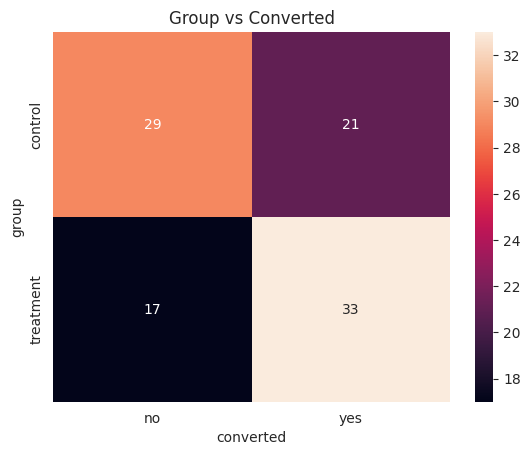

In [ ]:
#heatmap group vs convertion
sns.heatmap(df.pivot_table(index='group', columns='converted', aggfunc='size'), annot=True)
plt.title('Group vs Converted')
plt.show()

Observations:

* The treatment group (new landing page) had more conversions (33) compared to the control group (21).

* The control group had more users who did not convert (29) compared to the treatment group (17).

* This suggests that the new landing page (treatment group) was more effective in converting users than the old landing page.

# **Exploratory Data Analysis Summary **

* Both the control and treatment groups are evenly distributed (50% each).
* The old and new landing pages are also equally distributed.
* Most users spend between 4 and 8 minutes on the page.
* The new landing page drove more conversions than the old one.
* English users spent more time on the new landing page compared to other
  languages.
* The heatmap shows a higher conversion count in the treatment group (33)
  compared to control (21)

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


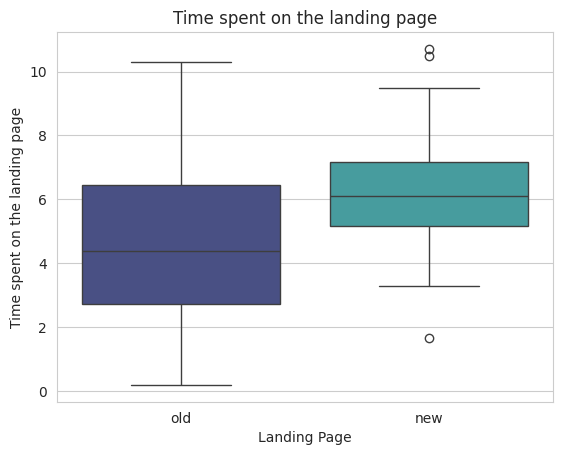

In [ ]:
#plotting time_spent_on_the_page
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page', hue='landing_page', palette='mako')
plt.title('Time spent on the landing page')
plt.xlabel('Landing Page')
plt.ylabel('Time spent on the landing page')
plt.show()

Observations:


*   Users tend to spend more time on the new landing page than the old one.
*   The median time spent on th enew landing page is higher than the old  
    landing page.
*   Outliers are present on the new page.


### Step 1: Define the null and alternate hypotheses

>$H_0$: The average time spent on the new landing page is **less than or equal to**  to the average time on the old

against the alternate hypothesis

>$H_a$: The average time spent on the new landing page is  **greater** than the average time on the old landing page.

We will test the null hypothesis

>$H_0:\mu_ new ≤\mu_ old$

against the alternate hypothesis

>$H_a:\mu_new>\mu_old$

### Step 2: Select Appropriate test

Two sample independent t-test (Right Tailed)

Because:

- We are comparing two independent group means.
- Unknown population σ.

In [ ]:
#importing function for two sample independent test
from scipy.stats import ttest_ind

### Step 3: Decide the significance level

α  = 0.05 ( As given)

5% significance level.


### Step 4: Collect and prepare data

In [ ]:
# find the sample means and sample standard deviations for the two samples rounded 2
means_values=(df.groupby('landing_page')['time_spent_on_the_page'].mean().round(2))
std_values=(df.groupby('landing_page')['time_spent_on_the_page'].std().round(2))

print('Means Values '+str(means_values))
print('Standard Deviation Values '+str(std_values))

Means Values landing_page
new    6.22
old    4.53
Name: time_spent_on_the_page, dtype: float64
Standard Deviation Values landing_page
new    1.82
old    2.58
Name: time_spent_on_the_page, dtype: float64


In [ ]:
old_page_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']
new_page_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']


In [ ]:
#Print mean and std for old page time and new page time
print('Mean of the time spent in the new page is:'+ str(round(new_page_time.mean(),2)))
print('Mean of the time spent in the old page is:'+ str(round(old_page_time.mean(),2)))

Mean of the time spent in the new page is:6.22
Mean of the time spent in the old page is:4.53


In [ ]:
#Print std and std for old page time and new page time
print('Standard Deviation of the time spent in the new page is:'+ str(round(new_page_time.std(),2)))
print('Standard Deviation of the time spent in the old page is:'+ str(round(old_page_time.std(),2)))

Standard Deviation of the time spent in the new page is:1.82
Standard Deviation of the time spent in the old page is:2.58


### Step 5: Calculate the p-value

In [ ]:
#find p_value
test_stat, p_value= ttest_ind(new_page_time,old_page_time,equal_var=False, alternative='greater')

print('P-value:', p_value)

P-value: 0.0001392381225166549


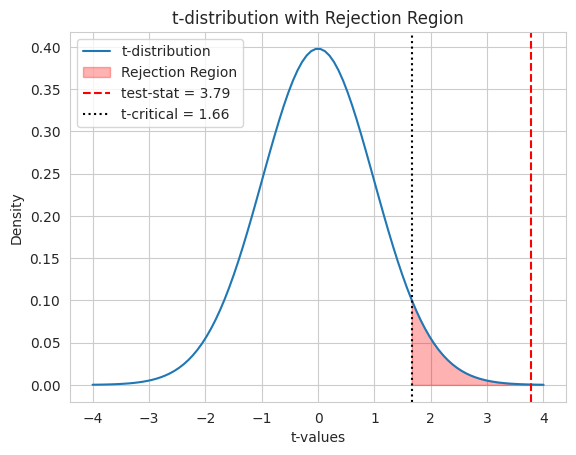

In [ ]:
from scipy.stats import t


# Degrees of freedom
df_t = len(old_page_time) + len(new_page_time) - 2

# Critical t-value at 5% significance (one-tailed)
alpha = 0.05
t_critical = t.ppf(1 - alpha, df=df_t)

# x-axis for t-distribution
x = np.linspace(-4, 4, 100)

# Plot the t-distribution
plt.plot(x, t.pdf(x, df_t), label='t-distribution')

# Shade the rejection region (right tail)
x_fill = np.linspace(t_critical, 4, 100)
plt.fill_between(x_fill, t.pdf(x_fill, df_t), color='red', alpha=0.3, label='Rejection Region')

# Mark the test statistic
plt.axvline(x=test_stat, color='r', linestyle='--', label=f'test-stat = {round(test_stat, 2)}')
plt.axvline(x=t_critical, color='black', linestyle=':', label=f't-critical = {round(t_critical, 2)}')

# Add labels and legend
plt.title("t-distribution with Rejection Region")
plt.xlabel("t-values")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### Step 6: Compare the p-value with $\alpha$

In [ ]:
#compare p_value print conclusion based on p_value
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


### Step 7:  Draw inference

Observations:



*   As p-value (~0.0001392) is less than the level of significance (α = 0.05)
*   We can reject the null hypothesis.
*   There is enough evidence to conclude users spend more time on the new
    landing page than the old page.


The new landing page successfully engages users for a longer time.    

  

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Perform Visual Analysis

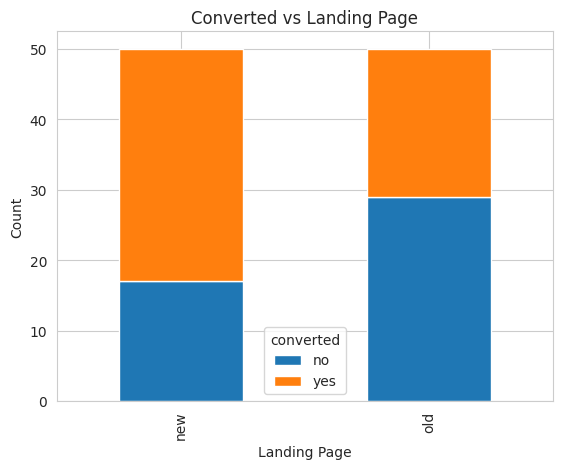

In [ ]:
#Visualizing
pd.crosstab(df['landing_page'], df['converted']).plot(kind='bar', stacked=True)
plt.title('Converted vs Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Count')
plt.show()


Observations:
* Higher convesion on new landing page.
* The old page has a higher non converted.

Step 1: Define the Null and Alternate Hypotheses

>$H_0$: The conversion rate for the new landing page is **less or equal** to the conversion rate of the old page.

against the alternate hypothesis

>$H_a$: The conversion rate for the new landing page is **greater** to the conversion rate of the old page.

We will test the null hypothesis

>$H_0$: p_new ≤  p_old

against the alternate hypothesis

>$H_a$: p_new > p_old

Step 2: Select Appropriate Test

**Two sample proportions z-test.** Since we are comparing proportions between two independent groups

Step 3: Decide the Significance Level

α = 0.05 (5%). As given.

Step 4: Collect and Prepare Data

In [ ]:
#separate groups
new_converted = df[df['landing_page'] == 'new']['converted']
old_converted = df[df['landing_page'] == 'old']['converted']

In [ ]:
#Number of success
success=[new_converted.value_counts().get('yes',0), old_converted.value_counts().get('yes',0)]

#Number of trials
nobs = [new_converted.count(), old_converted.count()]

print('Successes:', success)
print('Trials:', nobs)

Successes: [np.int64(33), np.int64(21)]
Trials: [np.int64(50), np.int64(50)]


Step 5: Calculate the p-value

In [ ]:
# importing required function
from statsmodels.stats.proportion import proportions_ztest

#find p_value
stat, p_value = proportions_ztest(count=success, nobs=nobs, alternative = 'larger')

print('P-value:', p_value)

P-value: 0.008026308204056278


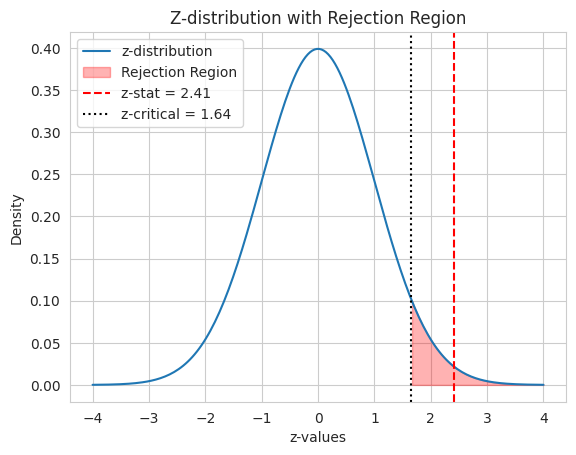

In [ ]:
# Step: Plotting the z-distribution and rejection region for proportions test
from scipy.stats import norm


# Define the test statistic (use your actual z-stat value from the test)
z_stat = stat  # from the proportions_ztest

# Define critical value for one-tailed test at 5% significance level
z_critical = norm.ppf(0.95)

# Create x values for the curve
x = np.linspace(-4, 4, 200)
y = norm.pdf(x, 0, 1)

# Plot the standard normal distribution
plt.plot(x, y, label='z-distribution')

# Fill the rejection region
plt.fill_between(x, y, where=(x > z_critical), color='red', alpha=0.3, label='Rejection Region')

# Add a vertical line for the test statistic
plt.axvline(x=z_stat, color='red', linestyle='--', label=f'z-stat = {z_stat:.2f}')

# Add vertical line for critical z value
plt.axvline(x=z_critical, color='black', linestyle='dotted', label=f'z-critical = {z_critical:.2f}')

# Add legend and labels
plt.title('Z-distribution with Rejection Region')
plt.xlabel('z-values')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Step 6: Compare the p-value with α

In [ ]:
#comparing p_value
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


Step 7: Draw Inference

Observations:

* As p-value (0.0080) is less than the level of significance (α = 0.05)
* We can reject the null hypothesis.
* There is enough evidence to conclude that the conversion rate for the new  
  page is greater than the conversion rate of the old page.


The new landing page is getting more conversion than the old page.

## 3. Does the converted status depend on the preferred language?

Perform Visual Analysis

In [ ]:
# Crosstab to visually inspect relationship
pd.crosstab(df['language_preferred'], df['converted'], margins=True)


converted,no,yes,All
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
All,46,54,100


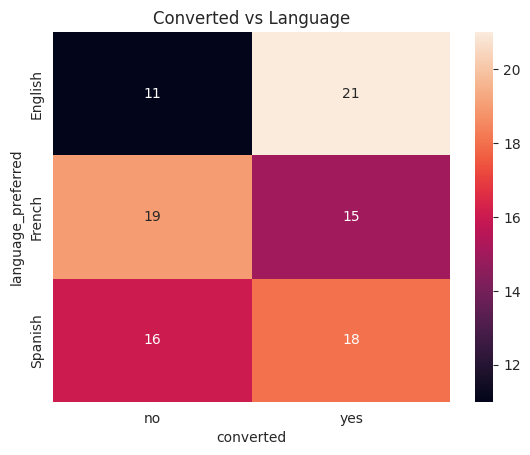

In [ ]:
#plotting the crosstab
sns.heatmap(pd.crosstab(df['language_preferred'], df['converted']), annot=True)
plt.title('Converted vs Language')
plt.show()

Observations:
 * English users show the highest conversion rate.
 * French users show the lowest conversion rate.
 * Spanish useres are relatively balanced.

>$H_0$: Conversion status is **independent** of preferred language.

against the alternate hypothesis

>$H_a$: Conversion status is  **dependent** of preferred language.

Step 2: Select Appropriate Test

**Chi-Square test of independence.** Since we are testing independence between two categorical variables.

Step 3: Decide the Significance Level

α = 0.05 (given in instructions).

Step 4: Collect and Prepare Data

In [ ]:
# Crosstab to visually inspect relationship
contingency_table =pd.crosstab(df['language_preferred'], df['converted'])
print(contingency_table)

converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18



Categorical variables - Yes

Expected value of the number of sample observations in each level of the variable is at least 5 - Yes

The number of observations in each level is greater than 5.

Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Step 5: Calculate the p-value

In [ ]:
#import the chi2_contingency
from scipy.stats import chi2_contingency

#find p_value
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('P-value:', p_value)

P-value: 0.2129888748754345


Step 6: Compare the p-value with α

In [ ]:
#compare p_value
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


Step 7: Draw Inference

Observations:

- As p-value (0.2129) is greater than the level of significance (α = 0.05)

- We fail to  reject the null hypothesis.

- This means conversion status and preferred language are independent.

- There is not significant relationship between user's preferred language and
  whether they got converted


The prferred language does not affect whether a user suscribes or not.

## 4. Is the time spent on the new page same for the different language users?

Perform Visual Analysis

In [ ]:
# Filter the data for only the new landing page
new_page_df = df[df['landing_page'] == 'new']


In [ ]:
new_page_df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


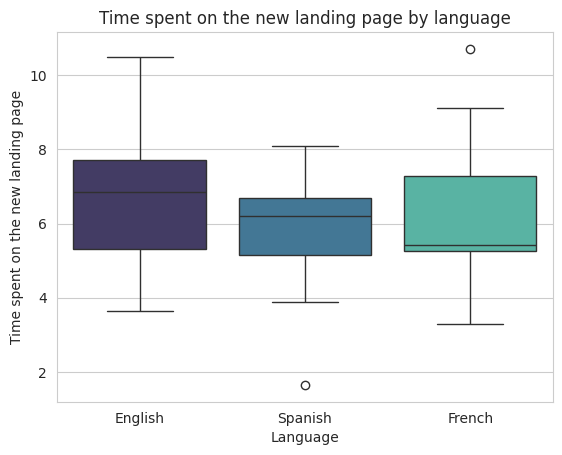

In [ ]:
sns.boxplot(data=new_page_df,x='language_preferred',y='time_spent_on_the_page', hue='language_preferred', palette='mako')
plt.title('Time spent on the new landing page by language')
plt.xlabel('Language')
plt.ylabel('Time spent on the new landing page')
plt.show()

Observations:

* English users show a wider interquartile range (IQR).
* Spanish group has low-end-outlier (~2 minutes).
* French and English have high-end-outliers(>9 minutes).
* The distribution are slighthly right skewed for English and French users, suggesting a few users spend a longer than usual time on the page.


Step 1: Define the Null and Alternate Hypotheses

>$H_0$: The average time spent on the new langing page is **the same** for users with different language preferences.

against the alternate hypothesis

>$H_a$: The average time spent on the new langing page **differs** for users with different language preferences.

We will test the null hypothesis

>$H_0$: μ1=μ2=μ3

against the alternate hypothesis

>$H_a$: At least one group mean is different.

Step 2: Select Appropriate Test

**One - Way ANOVA.** Since we are comparing means of more than 2 groups. (different languages)

Step 3: Decide the Significance Level

α = 0.05 (5%) — as given.

Step 4: Collect and Prepare Data

Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0$: Time spent follows a normal distribution against languages.

against the alternate hypothesis

>$H_a$: Time spent does not follows a normal distribution against languages.


In [ ]:
# import required function
from scipy.stats import shapiro

# Shapiro test for each group
for lang in new_page_df['language_preferred'].unique():
    stat, p_value = shapiro(new_page_df[new_page_df['language_preferred'] == lang]['time_spent_on_the_page'])
    print(f'Shapiro Test p-value for {lang}:', p_value)


Shapiro Test p-value for English: 0.8863443479691289
Shapiro Test p-value for Spanish: 0.09006862258526895
Shapiro Test p-value for French: 0.32137149516853786


In [ ]:
w,p_value= stats.shapiro(new_page_df['time_spent_on_the_page'])
print('The p-value is: ',p_value)

The p-value is:  0.8040040364746845


In [ ]:
#compare p_value
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


Observations:
- We fails to reject the null hypothesis.
- The data follows a normal distribution.

Levene’s test

We will test the null hypothesis

>$H_0$: All population variances are equal.

against the alternate hypothesis

>$H_a$: At least one variance is different from the test.


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

In [ ]:
# import required function
from scipy.stats import levene

# Levene test
statistic, p_value = levene(
    new_page_df[new_page_df['language_preferred'] == 'English']['time_spent_on_the_page'],
    new_page_df[new_page_df['language_preferred'] == 'Spanish']['time_spent_on_the_page'],
    new_page_df[new_page_df['language_preferred'] == 'French']['time_spent_on_the_page']
)

print('Levene Test p-value:', p_value)



Levene Test p-value: 0.46711357711340173


Observations:
- We fails to reject the null hypothesis of homogeneity of variances.
- All population variances are equal.

Step 5: Calculate the p-value

In [ ]:
# import required function
from scipy.stats import f_oneway

# ANOVA test
stat_anova, p_value = f_oneway(
    new_page_df[new_page_df['language_preferred'] == 'English']['time_spent_on_the_page'],
    new_page_df[new_page_df['language_preferred'] == 'Spanish']['time_spent_on_the_page'],
    new_page_df[new_page_df['language_preferred'] == 'French']['time_spent_on_the_page']
)

print('ANOVA p-value:', p_value)



ANOVA p-value: 0.43204138694325955


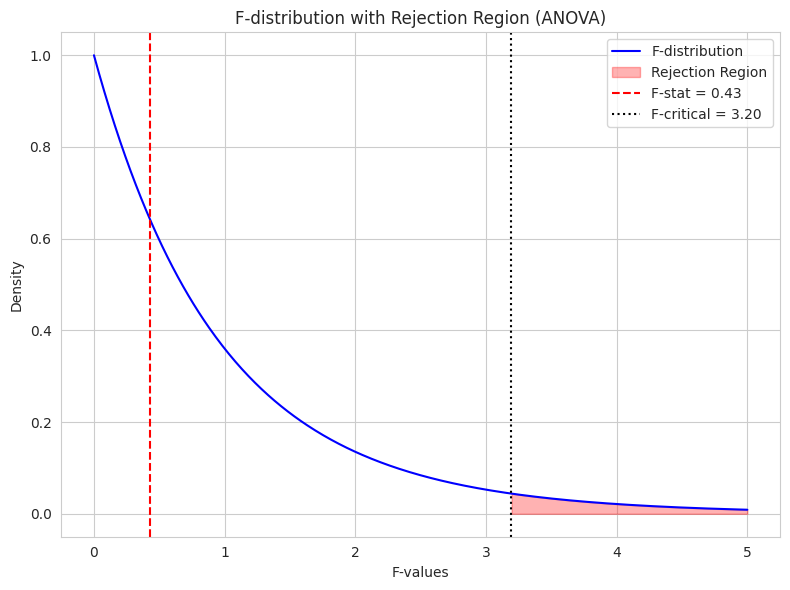

In [ ]:
from scipy.stats import f
# Parameters from the ANOVA test
f_stat = 0.43204138694325955  # Example F-statistic
df_between = 2  # k - 1 (k = 3 groups: English, Spanish, French)
df_within = 47  # N - k (N = 50 total samples, k = 3)

# Critical F-value at alpha = 0.05 for right-tailed test
alpha = 0.05
f_critical = f.ppf(1 - alpha, df_between, df_within)

# X range for plotting the F-distribution
x = np.linspace(0, 5, 500)
y = f.pdf(x, df_between, df_within)

# Plot the F-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='F-distribution', color='blue')

# Rejection region
plt.fill_between(x, y, where=(x > f_critical), color='red', alpha=0.3, label='Rejection Region')

# Vertical lines for F-stat and F-critical
plt.axvline(f_stat, color='red', linestyle='--', label=f'F-stat = {f_stat:.2f}')
plt.axvline(f_critical, color='black', linestyle='dotted', label=f'F-critical = {f_critical:.2f}')

# Labels and decorations
plt.title('F-distribution with Rejection Region (ANOVA)')
plt.xlabel('F-values')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Step 6: Compare the p-value with α

In [ ]:
#compare p_value
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


Step 7: Draw Inference

As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence, we can conclude that The average time spent on the new langing page is relative the same for users with different language preferences.

## Conclusion and Business Recommendations

Business Recommendations:



>- Q1: Do users spend more time on the new landing page than the old page?

p-value : 0.0001392
Decision: Reject Ho

Conclusion: **Yes, time spent is more on new page.**
The new landing page has significantly higher average time spent than the old page.

>- Q2: Is the conversion rate greater for the new page?

p-value : 0.008026

Decision: Reject Ho

Conclusion:
**Yes, conversion rate is higher on new page.**
Users of the new landing page have a significantly higher conversion rate.

>- Q3: Does the converted status depend on the preferred language?

p-value : 0.2129

Decision: Fail to reject Ho

Conclusion:
 **No, conversion does not depends on language.**
There is no evidence of association between conversion and laguage.

>- Q4: Is time spent on the new page the same for different languages?

Assumptions checked:

  - Normality (Shapiro-Wilk Test):   p > 0.05
  - Equal variances (Levene's Test): p > 0.05
  - P-value (Anova) : 0.4320
  - Decision: Fail to reject Ho


Conclusion:
 **Yes, the time spent in the new page is  the same for different languages.**
The time spent on the new page is relative the same across English, Spanish and French users.


**Overall effectiveness of the new landing page:**

 - Increases user engagement. Users spent more time in the new landing page.

 - Boosts conversion rates. Conversion rates is higher in the new
   landing page.

 - Independent of language. Conversion does not depend on language.
   
 - Equal user experience across languages. The time spent is similar for all languages.  

** Recommendations:**

 **E-News should roll out the new landing page to all users.**
 The new landing page proves effective in increasing engagement and conversion, offering consistent performance regardless of language.


___

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/ENews_Express_Learner_Notebook_Full_Code"

ls: cannot access '/content/drive/MyDrive/ENews_Express_Learner_Notebook_Full_Code': No such file or directory


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/ENews_Express_Learner_Notebook_Full_Code.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ENews_Express_Learner_Notebook_Full_Code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 1064620 bytes to /content/drive/MyDrive/Colab Notebooks/ENews_Express_Learner_Notebook_Full_Code.html


In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/Colab Notebooks/ENews_Express_Learner_Notebook_Full_Code.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>